# 8. Ανάγνωση αρχείων csv, η βιβλιοθήκη pandas

Στόχος του μαθήματος είναι να εξοικειωθεί ο φοιτητής με την ανάγνωση και εγγραφή αρχείων CSV. 
Επίσης γίνεται μια σύντομη αναφορά στις δυνατότητες της βιβλιοθήκης pandas όσον αφορά την διαχείριση δεδομένων σε μορφή πινάκων.

## Ανάγνωση αρχείων csv

Εισάγουμε τα απαραίτητα άρθρωματα (modules).

In [1]:
import os # μας επιτρέπει να έχουμε αλληλεπίδραση με το λειτουργικό σύστημα
import csv # απαραίτητο για την ανάγνωση και εγγραφή αρχείων CSV
from urllib import request # απαραίτητο για την λήψη αρχείων από το διαδίκτυο
import pandas as pd # η βιβλιοθήκη pandas για την διαχείρηση πινάκων
from pathlib import Path # βιβλιοθήκη για την διαχείριση των διαδρομών (paths) στον δίσκο
import numpy as np


Προαιρετικά ελέγχουμε ποιος είναι ο τρέχων κατάλογος:

In [2]:
print(os.getcwd())

/home/leonidas/Documents/uth/Programming/JupyterNotebooks/notes/notebooks


Αρχικά κατεβάζουμε από το διαδίκτυο τα αναγκαία αρχεία CSV.

(Πηγή δεδομένων https://www.kaggle.com/datasets/rinichristy/covid19-coronavirus-pandemic)

In [3]:
# Πρώτο αρχείο
remote_url = 'https://raw.githubusercontent.com/kokkytos/programming/main/docs/COVID-19%20Coronavirus.csv'
# Define the local filename to save data
local_file1 = 'COVID-19_Coronavirus.csv'
# Download remote and save locally
request.urlretrieve(remote_url, local_file1)

# Δεύτερο αρχείο
remote_url = 'https://raw.githubusercontent.com/kokkytos/programming/main/docs/COVID-19%20Coronavirus_V2.csv'
# Define the local filename to save data
local_file2 = 'COVID-19_Coronavirus_V2.csv'
# Download remote and save locally
request.urlretrieve(remote_url, local_file2)

('COVID-19_Coronavirus_V2.csv', <http.client.HTTPMessage at 0x7f4403a9edd0>)

In [4]:
with open(local_file1, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage']
['Afghanistan', 'Afghanistan', 'AFG', '40462186', 'Asia', '177827', '7671', '4395', '190', '4.313743132']
['Albania', 'Albania', 'ALB', '2872296', 'Europe', '273870', '3492', '95349', '1216', '1.275057509']
['Algeria', 'Algeria', 'DZA', '45236699', 'Africa', '265691', '6874', '5873', '152', '2.587215976']
['Andorra', 'Andorra', 'AND', '77481', 'Europe', '40024', '153', '516565', '1975', '0.382270638']
['Angola', 'Angola', 'AGO', '34654212', 'Africa', '99194', '1900', '2862', '55', '1.915438434']
['Anguilla', 'Anguilla', 'AIA', '15237', 'Latin America and the Caribbean', '2700', '9', '177200', '591', '0.333333333']
['Antigua and Barbuda', 'Antigua and Barbuda', 'ATG', '99348', 'Latin America and the Caribbean', '7493', '135', '75422', '1359', '1.801681569']
['Argentina', 'Argentina', 'ARG', '45921761', 'Latin 

In [5]:
with open(local_file1, 'r') as file:
    reader = csv.reader(file)
    line_count = 0
    for row in reader:
        if line_count == 0:
            print(f'Ονόματα στηλών {", ".join(row)}')
            print("\n\n")
            line_count += 1
        else:
            print(row)

Ονόματα στηλών Country, Other names, ISO 3166-1 alpha-3 CODE, Population, Continent, Total Cases, Total Deaths, Tot Cases//1M pop, Tot Deaths/1M pop, Death percentage



['Afghanistan', 'Afghanistan', 'AFG', '40462186', 'Asia', '177827', '7671', '4395', '190', '4.313743132']
['Albania', 'Albania', 'ALB', '2872296', 'Europe', '273870', '3492', '95349', '1216', '1.275057509']
['Algeria', 'Algeria', 'DZA', '45236699', 'Africa', '265691', '6874', '5873', '152', '2.587215976']
['Andorra', 'Andorra', 'AND', '77481', 'Europe', '40024', '153', '516565', '1975', '0.382270638']
['Angola', 'Angola', 'AGO', '34654212', 'Africa', '99194', '1900', '2862', '55', '1.915438434']
['Anguilla', 'Anguilla', 'AIA', '15237', 'Latin America and the Caribbean', '2700', '9', '177200', '591', '0.333333333']
['Antigua and Barbuda', 'Antigua and Barbuda', 'ATG', '99348', 'Latin America and the Caribbean', '7493', '135', '75422', '1359', '1.801681569']
['Argentina', 'Argentina', 'ARG', '45921761', 'Latin America an

To κόμμα (,) χρησιμοποιείται ως προκαθορισμένη επιλογή σαν διαχωριστικό στηλών.
Μπορούμε ρητά να δηλώσουμε ποιο θα είναι το διαχωριστικό με την επιλογή _delimiter_.

In [6]:
with open(local_file2, 'r') as file:
    reader = csv.reader(file, delimiter = ';',quoting=csv.QUOTE_ALL)
    for row in reader:
        print(row)

['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage']
['Afghanistan', 'Afghanistan', 'AFG', '40462186', 'Asia', '177827', '7671', '4395', '190', '4.313743132']
['Albania', 'Albania', 'ALB', '2872296', 'Europe', '273870', '3492', '95349', '1216', '1.275057509']
['Algeria', 'Algeria', 'DZA', '45236699', 'Africa', '265691', '6874', '5873', '152', '2.587215976']
['Andorra', 'Andorra', 'AND', '77481', 'Europe', '40024', '153', '516565', '1975', '0.382270638']
['Angola', 'Angola', 'AGO', '34654212', 'Africa', '99194', '1900', '2862', '55', '1.915438434']
['Anguilla', 'Anguilla', 'AIA', '15237', 'Latin America and the Caribbean', '2700', '9', '177200', '591', '0.333333333']
['Antigua and Barbuda', 'Antigua and Barbuda', 'ATG', '99348', 'Latin America and the Caribbean', '7493', '135', '75422', '1359', '1.801681569']
['Argentina', 'Argentina', 'ARG', '45921761', 'Latin 

In [7]:
with open(local_file1, 'r') as file:
    csv_file = csv.DictReader(file)
    for row in csv_file:
        print(dict(row))

{'Country': 'Afghanistan', 'Other names': 'Afghanistan', 'ISO 3166-1 alpha-3 CODE': 'AFG', 'Population': '40462186', 'Continent': 'Asia', 'Total Cases': '177827', 'Total Deaths': '7671', 'Tot\xa0Cases//1M pop': '4395', 'Tot\xa0Deaths/1M pop': '190', 'Death percentage': '4.313743132'}
{'Country': 'Albania', 'Other names': 'Albania', 'ISO 3166-1 alpha-3 CODE': 'ALB', 'Population': '2872296', 'Continent': 'Europe', 'Total Cases': '273870', 'Total Deaths': '3492', 'Tot\xa0Cases//1M pop': '95349', 'Tot\xa0Deaths/1M pop': '1216', 'Death percentage': '1.275057509'}
{'Country': 'Algeria', 'Other names': 'Algeria', 'ISO 3166-1 alpha-3 CODE': 'DZA', 'Population': '45236699', 'Continent': 'Africa', 'Total Cases': '265691', 'Total Deaths': '6874', 'Tot\xa0Cases//1M pop': '5873', 'Tot\xa0Deaths/1M pop': '152', 'Death percentage': '2.587215976'}
{'Country': 'Andorra', 'Other names': 'Andorra', 'ISO 3166-1 alpha-3 CODE': 'AND', 'Population': '77481', 'Continent': 'Europe', 'Total Cases': '40024', 'To

In [8]:
with open(local_file1, 'r') as file:
    reader = csv.reader(file, delimiter = ';',quoting=csv.QUOTE_ALL)
    for row in reader:
        print(row)

['Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot\xa0Cases//1M pop,Tot\xa0Deaths/1M pop,Death percentage']
['Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743132']
['Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275057509']
['Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587215976']
['Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382270638']
['Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438434']
['Anguilla,Anguilla,AIA,15237,Latin America and the Caribbean,2700,9,177200,591,0.333333333']
['Antigua and Barbuda,Antigua and Barbuda,ATG,99348,Latin America and the Caribbean,7493,135,75422,1359,1.801681569']
['Argentina,Argentina,ARG,45921761,Latin America and the Caribbean,9041124,128065,196881,2789,1.416472111']
['Armenia,Armenia,ARM,2972939,Asia,422574,8617,142140,2898,2.039169471']
['Aruba,Aruba,ABW,107560,Latin America and the Caribbean,34051,212,316577,1971,0.6225955


['St. Barth ,Saint Barthélemy,BLM,9930,Latin America and the Caribbean,4150,6,417925,604,0.144578313']
['St. Vincent Grenadines,Saint Vincent and the Grenadines,VCT,111557,Latin America and the Caribbean,6746,106,60471,950,1.571301512']
['Sudan,Sudan,SDN,45640385,Africa,61955,4907,1357,108,7.920264708']
['Suriname,Suriname,SUR,595833,Latin America and the Caribbean,79232,1325,132977,2224,1.67230412']
['Sweden,Sweden,SWE,10209507,Europe,2487852,18331,243680,1795,0.736820357']
['Switzerland,Switzerland,CHE,8765420,Europe,3490876,13715,398255,1565,0.392881328']
['Syria,Syrian Arab Republic,SYR,18244381,Asia,55711,3144,3054,172,5.64340974']
['Taiwan,"China, Taiwan Province of China",TWN,23892241,Asia,24310,853,1017,36,3.508844097']
['Tajikistan,Tajikistan,TJK,9912437,Asia,17388,124,1754,13,0.713135496']
['Tanzania,United Republic of Tanzania,TZA,62710097,Africa,33815,800,539,13,2.365813988']
['Thailand,Thailand,THA,70106601,Asia,3711595,25418,52942,363,0.684826874']
['Timor-Leste,Timor-Le

## Εγγραφή σε csv

In [9]:
with open('employee_file.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=';', quotechar='"', quoting=csv.QUOTE_ALL)

    employee_writer.writerow(['John Smith', 'Accounting', 'June'])
    employee_writer.writerow(['Erica Meyers', 'IT', 'March'])

Εγγραφή σε CSV από dictionary (λεξικό). Σε αυτή την περίπτωση πρέπει να ορίσουμε προκαταβολικά τα ονόματα των στηλών (fieldnames παράμετρος στην μέθοδο DictWriter) για να γίνει η ταυτοποίηση των κλειδιών από το λεξικό κατά την εγγραφή.

In [10]:
with open('employee_file2.csv', mode='w') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames= ['emp_name', 'dept', 'birth_month'],delimiter=';')

    writer.writeheader()
    writer.writerow({'emp_name': 'John Smith', 'dept': 'Accounting', 'birth_month': 'November'})
    writer.writerow({'emp_name': 'Erica Meyers', 'dept': 'IT', 'birth_month': 'March'})

## Η βιβλιοθήκη pandas

![alt text](pandas-data-structure.svg)

Δημιουργία pandas Series object 

In [11]:
s = pd.Series([2, 4, 6, 8, 10])



Δημιουργία pandas Dataframe object. Η τελευτάι στήλη είναι από το προηγούμενο Series object.

In [12]:
df = pd.DataFrame({'X':[78,85,96,80,86], 'Y':[84,94,89,83,86],'Z':[86,97,96,72,83], 'V':s});
df

,X,Y,Z,V
0,78,84,86,2
1,85,94,97,4
2,96,89,96,6
3,80,83,72,8
4,86,86,83,10


Δημιουργία Index object

In [13]:
index = pd.Index(list('abcde'))
print(index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


Αλλαγή Index σε ένα dataframe

In [14]:
df = df.set_index(index)
df

,X,Y,Z,V
a,78,84,86,2
b,85,94,97,4
c,96,89,96,6
d,80,83,72,8
e,86,86,83,10


Επιλογή στηλών από το dataframe df σε ένα νέο dataframe με το όνομα df_subset

In [15]:
df_subset = df[['X','V']]
df_subset


,X,V
a,78,2
b,85,4
c,96,6
d,80,8
e,86,10


Ορισμός τιμών μια στήλης σε κενό (nan), με βάση κριτήρια

In [16]:

df.loc[df['Z'] >= 96,'Z'] = np.nan
df


,X,Y,Z,V
a,78,84,86.0,2
b,85,94,NaN,4
c,96,89,NaN,6
d,80,83,72.0,8
e,86,86,83.0,10


Φιλτράρισμα δεδομένων

In [17]:
df_2 =  df[df['V'] >= 6] 
df_2

,X,Y,Z,V
c,96,89,NaN,6
d,80,83,72.0,8
e,86,86,83.0,10


ή αλλιώς:

In [18]:
df_2 =  df.loc[df['V'] >= 8] 
df_2

,X,Y,Z,V
d,80,83,72.0,8
e,86,86,83.0,10


με βάση συνθήκη όπου περιέχονται στην στήλη V τα στοιχεία της λίστας options

In [19]:

options=[4,10]
rslt_df = df[df['V'].isin(options)] 
rslt_df

,X,Y,Z,V
b,85,94,NaN,4
e,86,86,83.0,10


Τροποποίηση κελιού

In [20]:
df.at['a', 'V'] = 1000
df


,X,Y,Z,V
a,78,84,86.0,1000
b,85,94,NaN,4
c,96,89,NaN,6
d,80,83,72.0,8
e,86,86,83.0,10


In [21]:
df.to_csv("leonidas.csv", sep=';', index=False)

Προσθήκη γραμμής

In [22]:
# Νεα γραμμή σαν dataframe

row_df = pd.DataFrame([ pd.Series([1,2,8,99])], index = ["f"])
row_df.columns =['X', 'Y', 'Z', 'V']
row_df

,X,Y,Z,V
f,1,2,8,99


Εναλλακτικά φτιάχνουμε αν θελουμε την ιδια γραμμή με άλλη μέθοδο (μέσω ενός dictionary):

In [23]:
my_dictionary = {'X': [1], 'Y': [2],'Z': [8], 'V': [99]}
row_df = pd.DataFrame.from_dict(my_dictionary)
row_df = row_df.set_index(pd.Index(['f']))
row_df

,X,Y,Z,V
f,1,2,8,99


In [24]:
# Συννένωση
df1 = pd.concat([df,row_df],ignore_index=False)
df1

,X,Y,Z,V
a,78,84,86.0,1000
b,85,94,NaN,4
c,96,89,NaN,6
d,80,83,72.0,8
e,86,86,83.0,10
f,1,2,8.0,99


Αντιμετάθεση στηλών και γραμμών (transpose)

In [25]:
df2 = df1.T # transpose
df2

,a,b,c,d,e,f
X,78.0,85.0,96.0,80.0,86.0,1.0
Y,84.0,94.0,89.0,83.0,86.0,2.0
Z,86.0,NaN,NaN,72.0,83.0,8.0
V,1000.0,4.0,6.0,8.0,10.0,99.0


In [26]:
list(df2.columns)


['a', 'b', 'c', 'd', 'e', 'f']

In [27]:
list(df1.index)

['a', 'b', 'c', 'd', 'e', 'f']

Μπορούμε να διαβάσουμε ένα αρχείο CSV σαν pandas dataframe.

Ακολουθεί το παρακάτω παράδειγμα με δεδομένα Airbnb.

Λήψη αρχείου csv από το διαδίκτυο:

In [28]:
remote_url = 'http://data.insideairbnb.com/greece/attica/athens/2021-12-23/visualisations/listings.csv'
# Define the local filename to save data
local_file3 = 'listings.csv'
# Download remote and save locally
request.urlretrieve(remote_url, local_file3)

('listings.csv', <http.client.HTTPMessage at 0x7f43c0953c10>)

Ανάγνωση του αρχείου σαν panda DataFrame

In [29]:
# read the airbnb NYC listings csv file
airbnb = pd.read_csv(local_file3)

Εκτύπωση των πρώτων 10 γραμμών

In [30]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,70,1,32,2021-09-24,0.25,6,114,7,00000957568
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,50,1,54,2021-11-01,0.48,6,364,10,00001070920
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,38,1,76,2021-12-09,0.67,6,312,22,00000957080
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,48,1,27,2021-11-08,0.19,6,236,4,00000957422
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,52,1,17,2020-01-08,0.15,6,176,0,00000957579


Εκτύπωση των 5 τελευταίων γραμμών

In [31]:
airbnb.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9663,53913979,Beautiful Apt. closed to Monastiraki!,35760684,Eleni,NaN,ΚΕΡΑΜΕΙΚΟΣ,37.980058,23.719821,Entire home/apt,90,2,0,NaN,NaN,5,360,0,88749558874
9664,53914527,Cosy duplex apartment at Petralona,195674383,Selda,NaN,ΠΕΤΡΑΛΩΝΑ,37.974262,23.709322,Entire home/apt,48,3,0,NaN,NaN,1,354,0,Exempt
9665,53914614,Classical vibes in this deluxe apt. in heart o...,35760684,Eleni,NaN,ΚΕΡΑΜΕΙΚΟΣ,37.980330,23.721530,Entire home/apt,90,2,0,NaN,NaN,5,360,0,33332541105
9666,53915110,Family Room at the Trendy by Athens Prime Hotels,436756020,Paris,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.985432,23.732206,Private room,143,1,0,NaN,NaN,1,324,0,1190373
9667,53916052,"Modern, stylish and big apartment in Athens ce...",436763650,Styliani,NaN,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.984031,23.721455,Entire home/apt,70,2,0,NaN,NaN,1,364,0,00001393010
9668,53928165,About love AT015,428201678,Fenglin,NaN,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.991477,23.723229,Entire home/apt,40,2,0,NaN,NaN,2,167,0,00001372314
9669,53930376,Superior Queen Room by 33 Solonos suites,114156592,Bill & John,NaN,ΚΟΛΩΝΑΚΙ,37.979829,23.736844,Private room,110,1,0,NaN,NaN,32,365,0,00001393195
9670,53932240,"2 room sunny modern apartment, top floor + bal...",34801484,Daria,NaN,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.982810,23.718970,Entire home/apt,33,4,0,NaN,NaN,1,276,0,Exempt
9671,53934984,"Διαμέρισμα στην πλατεία Αττικής ,πλησίον του μ...",381802767,Hakob,NaN,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,37.997002,23.720508,Entire home/apt,32,1,0,NaN,NaN,1,365,0,Exempt
9672,53938913,A.P Athens,423806621,Anna,NaN,ΝΕΑ ΚΥΨΕΛΗ,37.996459,23.744231,Entire home/apt,40,1,0,NaN,NaN,1,365,0,00001396920


Μπορούμε να πάρουμε για όλες τις αριθμητικές στήλες περιγραφικά στατιστικά (mean, std, min, τεταρτημόρια κτλ) με την μέθοδο describe()

In [32]:
airbnb.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.673000e+03,9.673000e+03,0.0,9673.000000,9673.000000,9673.000000,9673.000000,9673.000000,7916.000000,9673.000000,9673.000000,9673.000000
mean,3.255635e+07,1.475417e+08,NaN,37.979912,23.731762,86.912850,3.234570,42.868913,1.520586,10.923292,240.921638,9.771632
std,1.366145e+07,1.188964e+08,NaN,0.013241,0.012369,326.785191,19.523021,71.038260,1.590922,22.798110,127.491219,15.926126
min,1.059500e+04,3.717700e+04,NaN,37.950550,23.697700,7.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.293145e+07,3.904215e+07,NaN,37.969230,23.723970,36.000000,1.000000,1.000000,0.350000,1.000000,151.000000,0.000000
50%,3.335690e+07,1.304658e+08,NaN,37.978340,23.729810,50.000000,2.000000,13.000000,1.000000,3.000000,296.000000,3.000000
75%,4.377216e+07,2.284115e+08,NaN,37.987960,23.737820,80.000000,2.000000,52.000000,2.172500,9.000000,353.000000,13.000000
max,5.393891e+07,4.367636e+08,NaN,38.034497,23.780220,8000.000000,1000.000000,753.000000,20.390000,153.000000,365.000000,359.000000


Ανάγνωση των δεδομένων μιας στήλης σαν pandas Series

In [33]:
# Results for a single column
airbnb['name']

0                     96m2, 3BR, 2BA, Metro, WI-FI etc...
1            Athens Quality Apartments - Deluxe Apartment
2                      Athens Quality Apartments - Studio
3          AQA-No2 1-bedroom, smart tv, fiber connection,
4                      54m2, 1-br, cable tv, wi-fi, metro
                              ...                        
9668                                     About love AT015
9669             Superior Queen Room by 33 Solonos suites
9670    2 room sunny modern apartment, top floor + bal...
9671    Διαμέρισμα στην πλατεία Αττικής ,πλησίον του μ...
9672                                           A.P Athens
Name: name, Length: 9673, dtype: object

Επιλογή συγκεκριμένων στηλών από το dataframe

In [34]:
# results for multiple columns
airbnb[['host_id', 'host_name']]


,host_id,host_name
0,37177,Emmanouil
1,37177,Emmanouil
2,37177,Emmanouil
3,37177,Emmanouil
4,37177,Emmanouil
...,...,...
9668,428201678,Fenglin
9669,114156592,Bill & John
9670,34801484,Daria
9671,381802767,Hakob


Επιστροφή του τύπου δεδομένων για όλες τις στήλες

In [35]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Μετατροπή της στήλης last_review σε datetime64 object

In [36]:
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])
airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

Μπορούμε να εξάγουμε το έτος από ένα datetime object σε μια νέα στήλη. Μετατροπή της στήλης year σε ακέραιο

In [37]:
# extract the year from a datetime series
airbnb['year'] = airbnb['last_review'].dt.year

# to integer
airbnb['year'] = airbnb['year'].astype('UInt16')

airbnb['year'].head()

0    2021
1    2021
2    2021
3    2021
4    2020
Name: year, dtype: UInt16

Το ίδιο μπορούμε να κάνουμε και με τον μήνα.

In [38]:
airbnb['month'] = airbnb['last_review'].dt.month
airbnb['month']=airbnb['month'].astype('UInt16')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,month
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,70,1,32,2021-09-24,0.25,6,114,7,00000957568,2021,9
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,50,1,54,2021-11-01,0.48,6,364,10,00001070920,2021,11
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,38,1,76,2021-12-09,0.67,6,312,22,00000957080,2021,12
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,48,1,27,2021-11-08,0.19,6,236,4,00000957422,2021,11
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,52,1,17,2020-01-08,0.15,6,176,0,00000957579,2020,1


Αν κάποια στήλη περιέχει κενά στην αρχή ή το τέλος της μπορούμε να τα αφαιρέσουμε ως εξής:

In [39]:
airbnb['name'] = airbnb['name'].str.strip()
airbnb['name'].head()


0               96m2, 3BR, 2BA, Metro, WI-FI etc...
1      Athens Quality Apartments - Deluxe Apartment
2                Athens Quality Apartments - Studio
3    AQA-No2 1-bedroom, smart tv, fiber connection,
4                54m2, 1-br, cable tv, wi-fi, metro
Name: name, dtype: object

Μετατροπή όλων των χαρακτήρων μιας στήλης σε πεζά:

In [40]:
airbnb['name_lower'] = airbnb['name'].str.lower()
airbnb['name_lower'].head()

0               96m2, 3br, 2ba, metro, wi-fi etc...
1      athens quality apartments - deluxe apartment
2                athens quality apartments - studio
3    aqa-no2 1-bedroom, smart tv, fiber connection,
4                54m2, 1-br, cable tv, wi-fi, metro
Name: name_lower, dtype: object

Δημιουργία μιας στήλης που στηρίζεται σε υπολογισμό μεταξύ άλλων στηλών (calculated column)

In [41]:
airbnb['min_revenue'] = airbnb['minimum_nights'] * airbnb['price']
airbnb[['minimum_nights', 'price', 'min_revenue']]

,minimum_nights,price,min_revenue
0,1,70,70
1,1,50,50
2,1,38,38
3,1,48,48
4,1,52,52
...,...,...,...
9668,2,40,80
9669,1,110,110
9670,4,33,132
9671,1,32,32


Υπολογισμός του μέσου όρου μιας στήλης

In [42]:
airbnb['price'].mean()

86.91285020159206

Υπολογισμός του διαμέσου μιας στήλης

In [43]:
airbnb['price'].median()

50.0

Υπολογισμό μέσου όρου τιμής ανά τύπο δωματίου

In [44]:
airbnb[['room_type', 'price']].groupby('room_type', as_index=False).mean()

,room_type,price
0,Entire home/apt,84.221882
1,Hotel room,188.514706
2,Private room,100.025054
3,Shared room,61.857143


Υπολογισμό διαμέσου τιμής ανά τύπο δωματίου. Χρησιμοποιούμε την στήλη room_type σαν index

In [45]:
airbnb[['room_type', 'price']].groupby('room_type', as_index=True).median()

,price
room_type,
Entire home/apt,51.0
Hotel room,105.0
Private room,38.0
Shared room,14.0


Υπολογισμό διαμέσου τιμής ανά τύπο δωματίου και έτος

In [46]:
airbnb[['room_type', 'year', 'price']].groupby(['room_type', 'year'], as_index=False).mean()


,room_type,year,price
0,Entire home/apt,2013,133.000000
1,Entire home/apt,2014,89.666667
2,Entire home/apt,2015,63.500000
3,Entire home/apt,2016,90.432432
4,Entire home/apt,2017,92.000000
5,Entire home/apt,2018,90.602094
6,Entire home/apt,2019,111.112040
7,Entire home/apt,2020,74.048780
8,Entire home/apt,2021,69.686602
9,Hotel room,2017,116.333333


Φιλτράρισμα γραμμών με βάση ένα κριτήριο (τιμή <1000) και προσάρτηση σε ένα νέο dataframe

In [47]:
# get all rows with price < 1000
airbnb_under_1000 = airbnb[airbnb['price'] < 1000]
airbnb_under_1000.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,month,name_lower,min_revenue
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,70,...,2021-09-24,0.25,6,114,7,00000957568,2021,9,"96m2, 3br, 2ba, metro, wi-fi etc...",70
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,50,...,2021-11-01,0.48,6,364,10,00001070920,2021,11,athens quality apartments - deluxe apartment,50
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,38,...,2021-12-09,0.67,6,312,22,00000957080,2021,12,athens quality apartments - studio,38
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,48,...,2021-11-08,0.19,6,236,4,00000957422,2021,11,"aqa-no2 1-bedroom, smart tv, fiber connection,",48
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,52,...,2020-01-08,0.15,6,176,0,00000957579,2020,1,"54m2, 1-br, cable tv, wi-fi, metro",52


Φιλτράρισμα με πολλαπλά κριτήρια (τιμή <1000 και έτος 2020)

In [48]:
# get all rows with price < 1000 and year equal to 2020
airbnb_2019_under_1000 = airbnb[(airbnb['price'] < 1000) & (airbnb['year'] == 2020)]
airbnb_2019_under_1000.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,month,name_lower,min_revenue
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,52,...,2020-01-08,0.15,6,176,0,00000957579,2020,1,"54m2, 1-br, cable tv, wi-fi, metro",52
18,138386,"Apartment Dora , Service with style",675611,Yavor,NaN,ΠΑΓΚΡΑΤΙ,37.96783,23.74970,Entire home/apt,58,...,2020-01-20,0.47,1,52,0,00000208960,2020,1,"apartment dora , service with style",174
30,281158,"Center 1, Metro 30m, Satelite TV",640163,Nikos,NaN,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,37.99253,23.73115,Entire home/apt,45,...,2020-02-29,0.48,9,144,0,00000251837,2020,2,"center 1, metro 30m, satelite tv",90
41,469140,Our first love #01 | Thiseio Residencies,2289590,Live In Athens,NaN,ΘΗΣΕΙΟ,37.97665,23.71850,Entire home/apt,89,...,2020-11-02,0.51,13,301,0,00000546911,2020,11,our first love #01 | thiseio residencies,178
42,470219,Our Playground #02 | Thiseio Residencies,2289590,Live In Athens,NaN,ΘΗΣΕΙΟ,37.97525,23.71957,Entire home/apt,64,...,2020-10-12,0.15,13,251,0,00001176980,2020,10,our playground #02 | thiseio residencies,64000


Ιστόγραμμα για την στήλη price στον πίνακα airbnb_under_1000

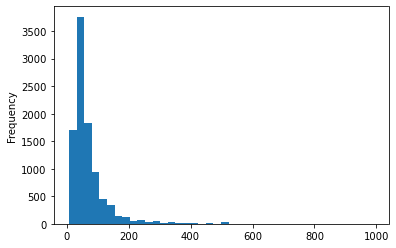

In [49]:
ax = airbnb_under_1000['price'].plot.hist(bins=40)

# Βιβλιογραφία

pandas Tutorial for Beginners, https://www.datacamp.com/tutorial/pandas, Πρόσβαση: 18/05/2022

Reading and Writing CSV Files in Python, https://realpython.com/python-csv/#reading-csv-files-with-csv, Πρόσβαση: 18/05/2022

Reading CSV files in Python, https://www.programiz.com/python-programming/reading-csv-files, Πρόσβαση: 18/05/2022

COVID-19 Coronavirus Pandemic, https://www.kaggle.com/datasets/rinichristy/covid19-coronavirus-pandemic, Πρόσβαση: 18/05/2022
Pandas User Guide, https://pandas.pydata.org/docs/user_guide/index.html#user-guide, Πρόσβαση: 23/05/2022

McKinney, W., 2013. Python for data analysis. O’Reilly, Beijing.

